In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def gauss(x,mu,s):
    return np.exp(-(x-mu)**2/(2*s**2))

In [22]:
def gauss_func(w,x):
    m = len(w) -1   # 차원의 갯수 
    mu = np.linspace(5,30,m)
    if m>1 :
        s = mu[1] - mu[0]
    else :
        s = mu[0]
    y = np.zeros_like(x)
    for j in range(m):
        y = y+ w[j]* gauss(x,mu[j],s)
    y = y+ w[m]
    return y    

In [17]:
def mse_gauss_func(x,t,w):
    y = gauss_func(w,x)
    mse = np.mean((y-t)**2)
    return mse

In [34]:
def fit_gauss_func(x,t,m):
    mu = np.linspace(5,30,m)
    if m>1 :
        s = mu[1] - mu[0]
    else :
        s =mu[0]
    n = x.shape[0]
    psi = np.ones((n,m+1))
    for j in range(m):
        psi[:,j] = gauss(x,mu[j],s)
    psi_T = np.transpose(psi)
    
    b = np.linalg.inv(psi_T.dot(psi))
    c = b.dot(psi_T)
    w = c.dot(t)
    return w

In [35]:
def show_gauss_func(w):
    xb = np.linspace(X_min,X_max,100)
    y = gauss_func(w,xb)
    plt.plot(xb,y,'r-',linewidth=3)
    plt.xlabel('Age, X')
    plt.ylabel('Height, T')

In [36]:
np.random.seed(seed=1)
X_min = 0
X_max = 2.5
X_n = 30
#X = 5 + 25*np.random.rand(X_n)
#prm_c=[170, 108, 0.2]
#T = prm_c[0] - prm_c[1]*np.exp(-prm_c[2]*X) + 4*np.random.randn(X_n)


X = np.zeros(X_n)
T = np.zeros(X_n,dtype=np.uint8)
Dist_s = [0.4, 0.8]
Dist_w = [0.8, 1.6]
Pi = 0.5
for n in range(X_n):
    wk = np.random.rand()
    #T[n] = 0 * (wk<Pi) + 1 * (wk>=Pi)
    T[n] = wk>=Pi
    X[n] = np.random.rand() * Dist_w[T[n]] + Dist_s[T[n]]

np.savez('ch5_data.npz',X=X,X_min=X_min,X_max=X_max,X_n=X_n,T=T)


M[0]=1
W[0]=[ 6.3 -4.3]
SD[0]=0.26 cm

M[1]=2
W[1]=[ 24.   23.7 -35.5]
SD[1]=0.26 cm

M[2]=4
W[2]=[ -17538.3   67031.2 -339173.4 1614395.     5086.4]
SD[2]=0.21 cm

M[3]=7
W[3]=[-7.36917600e+05  1.15399365e+07 -2.38358421e+08  7.56054050e+09
 -3.79288738e+11  2.81776857e+13 -2.40444845e+15  3.62339000e+04]
SD[3]=0.34 cm



IndexError: list assignment index out of range

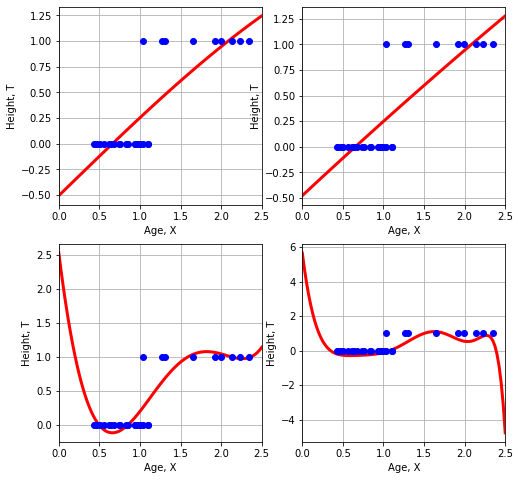

In [38]:
plt.figure(figsize=(8,8))
M = [1,2,4,7,9]
NOG = 4
W_arr= [[],[],[],[]]

for w in range(len(M)) :
    W_arr[w] = fit_gauss_func(X,T,M[w])
    plt.subplot(2,2,w+1)
    show_gauss_func(W_arr[w])
    plt.plot(X,T,'bo')
    plt.xlim(X_min,X_max)
    plt.grid(True)
    mse = mse_gauss_func(X,T,W_arr[w])
    print('M[{0:d}]={1:d}'.format(w,M[w]))
    print('W[{0:d}]='.format(w)+str(np.round(W_arr[w],1)))
    print("SD[{0:d}]={1:.2f} cm\n".format(w,np.sqrt(mse)))
plt.show()

In [9]:
## 교차 검증

In [13]:
def kfold_gauss_func(x,t,m,k):
    n = x.shape[0]
    mse_train = np.zeros(k)
    mse_test = np.zeros(k)
    
    for i in range(0,k):
        x_train = x[np.fmod(range(n),k) != i]
        t_train = t[np.fmod(range(n),k) != i]
        x_test = x[np.fmod(range(n),k) == i]
        t_test = t[np.fmod(range(n),k) == i]
        
        wm = fit_gauss_func(x_train,t_train,m)
        mse_train[i] = mse_gauss_func(x_train,t_train,wm)
        mse_test[i] = mse_gauss_func(x_test,t_test,wm)
    return mse_train,mse_test
        

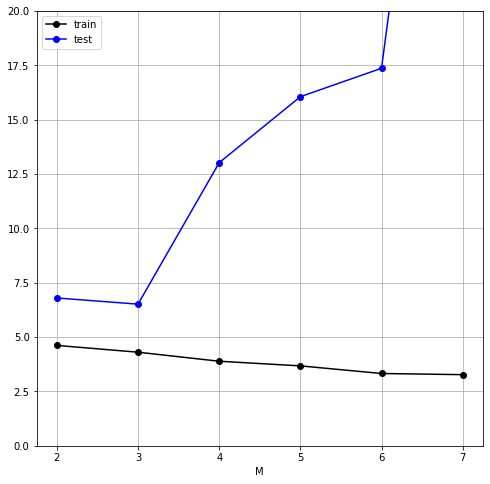

In [16]:
M = range(2,8)
K = 16
Cv_Gauss_train = np.zeros((K,len(M)))
Cv_Gauss_test = np.zeros((K,len(M)))
for i in range(0,len(M)):
    Cv_Gauss_train[:,i], Cv_Gauss_test[:,i]=kfold_gauss_func(X,T,M[i],16)
mean_Gauss_train = np.sqrt(np.mean(Cv_Gauss_train, axis=0))
mean_Gauss_test = np.sqrt(np.mean(Cv_Gauss_test,axis=0))

plt.figure(figsize=(8,8))
plt.plot(M,mean_Gauss_train,'k-o',label='train')
plt.plot(M,mean_Gauss_test,'b-o', label='test')
plt.legend(loc='upper left')
plt.ylim(0,20)
plt.grid(True)
plt.xlabel('M')
plt.show()

W=[ 344.8   -6.3  366.2 -259. ]
SD=4.37 cm


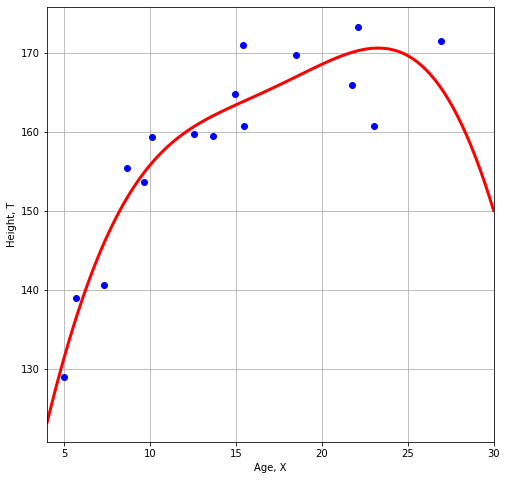

In [18]:
M = 3
plt.figure(figsize=(8,8))
W = fit_gauss_func(X,T,M)
show_gauss_func(W)
plt.plot(X,T,'bo')
plt.xlim(X_min,X_max)
plt.grid(True)
mse = mse_gauss_func(X,T,W)
print('W='+str(np.round(W,1)))
print("SD={0:.2f} cm".format(np.sqrt(mse)))
plt.show()